# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [3]:
len(cities)%50+1

24

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather"
#units = "metric"
units = "imperial"

city_log = []
temp_log = []
rec_nums = []
set_nums = []
city_records = []

# Build partial query URL
query_url = f"{url}?appid={weather_api_key}&units={units}&q="

def cityQuery(city):
    return f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}"

record_num = 0
set_num = 0
#for i in range(0,len(cities)%50+1)
for city in cities:
    response = requests.get(query_url + city)
    if(record_num%51==0):
        set_num +=1
        record_num=0
    
    try:
        respjson = response.json()
        temp_log.append(respjson['main']['temp'])
        rec_nums.append(record_num)
        print(f"Processing Record {record_num} of Set {set_num} | {city}")
        record_num +=1
        city_log.append(respjson['name'])
        city_records.append(respjson)
        set_nums.append(set_num)
        
    except:
        print("City not found. Skipping...")
set_num+=1
print("-----------------------------\nData Retrieval Complete \n-----------------------------")

Processing Record 0 of Set 1 | kiwira
City not found. Skipping...
Processing Record 1 of Set 1 | husavik
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | leningradskiy
Processing Record 4 of Set 1 | port macquarie
Processing Record 5 of Set 1 | san policarpo
City not found. Skipping...
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | trapani
City not found. Skipping...
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | golden
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | mataura
City not found. Skipping...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | naron
Processing Record 17 of Set 1 | xining
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | catamarca
Processing Record 20 of Set 1 | lima
Processing Record 21 of Set 1 | s

Processing Record 35 of Set 4 | ostersund
Processing Record 36 of Set 4 | esperance
Processing Record 37 of Set 4 | shimsk
Processing Record 38 of Set 4 | castro
Processing Record 39 of Set 4 | svetlogorsk
Processing Record 40 of Set 4 | olinda
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | mezen
Processing Record 44 of Set 4 | constitucion
City not found. Skipping...
Processing Record 45 of Set 4 | san vicente
Processing Record 46 of Set 4 | saint-paul
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | samarai
Processing Record 49 of Set 4 | kataysk
City not found. Skipping...
Processing Record 50 of Set 4 | arman
Processing Record 0 of Set 5 | san patricio
Processing Record 1 of Set 5 | hauterive
Processing Record 2 of Set 5 | gorele
Processing Record 3 of Set 5 | saint george
Processing Record 4 of Set 5 | bereda
Processing Record 5 of Set 5 | daugavpils
Processing Record 6 of Set 5 | abu 

Processing Record 19 of Set 8 | niquero
Processing Record 20 of Set 8 | coahuayana
Processing Record 21 of Set 8 | catalao
Processing Record 22 of Set 8 | burgeo
City not found. Skipping...
Processing Record 23 of Set 8 | evensk
Processing Record 24 of Set 8 | nanortalik
Processing Record 25 of Set 8 | itaituba
Processing Record 26 of Set 8 | aklavik
Processing Record 27 of Set 8 | leeton
Processing Record 28 of Set 8 | valinhos
Processing Record 29 of Set 8 | kampene
Processing Record 30 of Set 8 | uusikaupunki
Processing Record 31 of Set 8 | sorong
Processing Record 32 of Set 8 | eidsvag
Processing Record 33 of Set 8 | rawlins
City not found. Skipping...
Processing Record 34 of Set 8 | ust-tsilma
Processing Record 35 of Set 8 | axim
City not found. Skipping...
Processing Record 36 of Set 8 | mount isa
Processing Record 37 of Set 8 | dhuburi
Processing Record 38 of Set 8 | vanimo
Processing Record 39 of Set 8 | eckernforde
Processing Record 40 of Set 8 | bambanglipuro
City not found. 

Processing Record 1 of Set 12 | wilmington
Processing Record 2 of Set 12 | sosnogorsk
Processing Record 3 of Set 12 | san cristobal
Processing Record 4 of Set 12 | isla vista
-----------------------------
Data Retrieval Complete 
-----------------------------


In [5]:
myDict = {"City":city_log,
          "Temperature":temp_log,
         "Record":city_records,
         "Set Number":set_nums,
         "Record Number":rec_nums}

#myDict = {"City":city_log,
#          "Set": set_nums
#          "Record": rec_nums
#          "Temperature":temp_log}

df = pd.DataFrame(myDict)
df.to_csv("city_weather_df")

In [6]:
df['Record']

0      {'coord': {'lon': 33.53, 'lat': -9.17}, 'weath...
1      {'coord': {'lon': -17.34, 'lat': 66.04}, 'weat...
2      {'coord': {'lon': -68.3, 'lat': -54.8}, 'weath...
3      {'coord': {'lon': 178.42, 'lat': 69.38}, 'weat...
4      {'coord': {'lon': 152.92, 'lat': -31.43}, 'wea...
                             ...                        
561    {'coord': {'lon': 41.87, 'lat': 9.59}, 'weathe...
562    {'coord': {'lon': -77.94, 'lat': 34.23}, 'weat...
563    {'coord': {'lon': 53.88, 'lat': 63.6}, 'weathe...
564    {'coord': {'lon': -72.22, 'lat': 7.77}, 'weath...
565    {'coord': {'lon': -119.86, 'lat': 34.41}, 'wea...
Name: Record, Length: 566, dtype: object

### Convert Raw Data to DataFrame

In [7]:
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []
temperature =[]
for i in range(len(df['Record'])):
    name.append(df['Record'][i]['name'])
    cloudiness.append(df['Record'][i]['clouds']['all'])
    country.append(df['Record'][i]['sys']['country'])
    date.append(df['Record'][i]['dt'])
    humidity.append(df['Record'][i]['main']['humidity'])
    lat.append(df['Record'][i]['coord']['lat'])
    lng.append(df['Record'][i]['coord']['lon'])
    temp_max.append(df['Record'][i]['main']['temp_max'])
    wind_speed.append(df['Record'][i]['wind']['speed'])
    temperature.append(df['Record'][i]['main']['temp'])

In [8]:
weatherDict = {"City":name,
              "Cloudiness":cloudiness,
               "Country": country,
              "Date":date,
              "Humidity":humidity,
              "Lat":lat,
              "Lng":lng,
              "Max Temp":temp_max,
              "Wind Speed":wind_speed,
               "Temperature": temperature
              }
weather_df = pd.DataFrame(weatherDict)

#Export the city data into a .csv.
weather_df.to_csv("../output_data/cities_weather.csv", index = False, header = True)

#Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Temperature
0,Kiwira,100,TZ,1585686885,60,-9.17,33.53,66.09,2.62,66.09
1,Husavik,75,IS,1585686885,48,66.04,-17.34,42.80,33.33,42.80
2,Ushuaia,40,AR,1585686885,66,-54.80,-68.30,50.00,11.41,50.00
3,Leningradskiy,13,RU,1585686886,91,69.38,178.42,7.57,5.39,7.57
4,Port Macquarie,18,AU,1585686795,100,-31.43,152.92,62.60,3.36,61.77


In [9]:
weather_df.count()

City           566
Cloudiness     566
Country        566
Date           566
Humidity       566
Lat            566
Lng            566
Max Temp       566
Wind Speed     566
Temperature    566
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

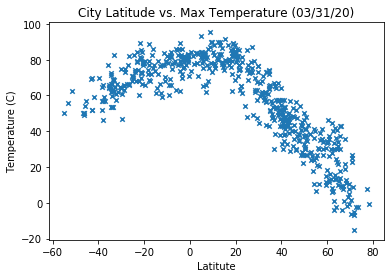

In [10]:
weather_df.plot('Lat','Temperature', kind ='scatter', marker='x')

plt.ylabel("Temperature (C)")
plt.xlabel("Latitute")
plt.title("City Latitude vs. Max Temperature (03/31/20)")
plt.savefig("../output_data/figure1.png")
plt.grid
plt.show()

#### Latitude vs. Humidity Plot

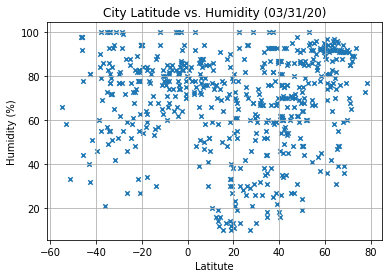

In [11]:
weather_df.plot('Lat','Humidity',kind = 'scatter', marker='x')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitute")
plt.title("City Latitude vs. Humidity (03/31/20)")
plt.savefig("../output_data/figure2.png")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

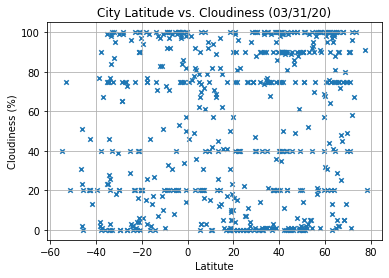

In [12]:
weather_df.plot('Lat','Cloudiness',kind = 'scatter', marker='x')

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitute")
plt.title("City Latitude vs. Cloudiness (03/31/20)")
plt.savefig("../output_data/figure3.png")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

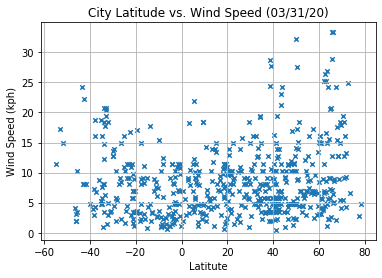

In [13]:
weather_df.plot('Lat','Wind Speed',kind = 'scatter', marker='x')

plt.ylabel("Wind Speed (kph)")
plt.xlabel("Latitute")
plt.title("City Latitude vs. Wind Speed (03/31/20)")
plt.savefig("../output_data/figure4.png")
plt.grid()
plt.show()

## Linear Regression

In [15]:
#function to create Linear Regression plots
def linearRegression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values, marker='x')
    plt.plot(x_values,regress_values,"r-")
    plt.grid()
    
    if slope>0:
        x = x_values.max()-35
        y = y_values.min()+1
    else:
        x = x_values.min()
        y = y_values.min()+1
      
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
   
    print(f"The r-squared is: {rvalue}")
    
    
    
    

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df[weather_df['Lat']>0]
southern_hemisphere = weather_df[weather_df['Lat']<0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9092693386619276


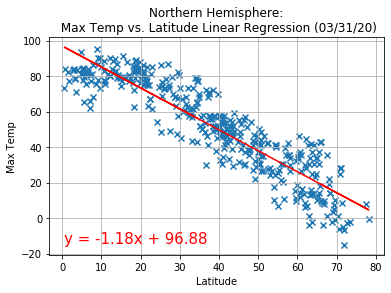

In [17]:
linearRegression(northern_hemisphere['Lat'],northern_hemisphere['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere:\n Max Temp vs. Latitude Linear Regression (03/31/20)")
plt.savefig("../output_data/figure5.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6739594936923147


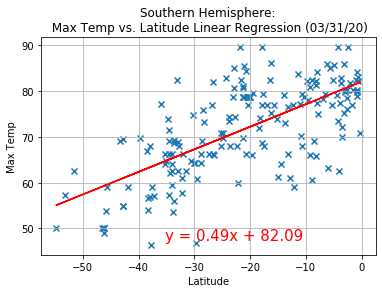

In [18]:
linearRegression(southern_hemisphere['Lat'],southern_hemisphere['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere:\n Max Temp vs. Latitude Linear Regression (03/31/20)")
plt.savefig("../output_data/figure6.png")

plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.27689914381476416


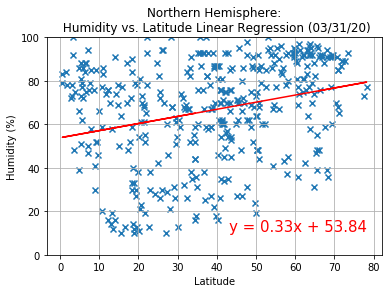

In [19]:
linearRegression(northern_hemisphere['Lat'],northern_hemisphere['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere:\n Humidity vs. Latitude Linear Regression (03/31/20)")
plt.ylim(0,100)
plt.savefig("../output_data/figure7.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16511857471787


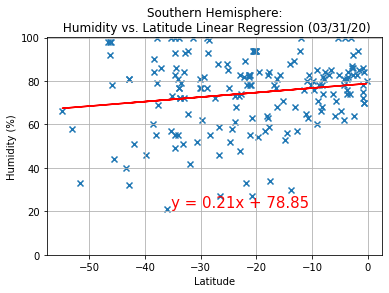

In [20]:
linearRegression(southern_hemisphere['Lat'],southern_hemisphere['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere:\n Humidity vs. Latitude Linear Regression (03/31/20)")
plt.ylim(0,100.1)
plt.savefig("../output_data/figure8.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16242179379965355


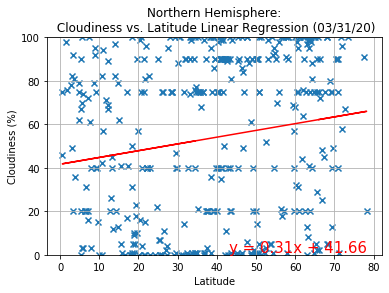

In [21]:
linearRegression(northern_hemisphere['Lat'],northern_hemisphere['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere:\n Cloudiness vs. Latitude Linear Regression (03/31/20)")
plt.ylim(0,100)
plt.savefig("../output_data/figure9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30087080491799817


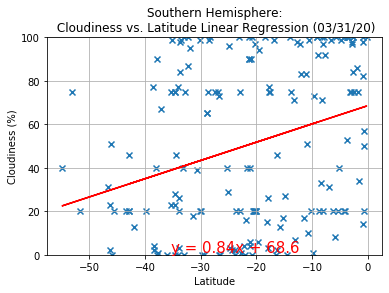

In [22]:
linearRegression(southern_hemisphere['Lat'],southern_hemisphere['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere:\n Cloudiness vs. Latitude Linear Regression (03/31/20)")
plt.ylim(0,100)
plt.savefig("../output_data/figure10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20713143587765126


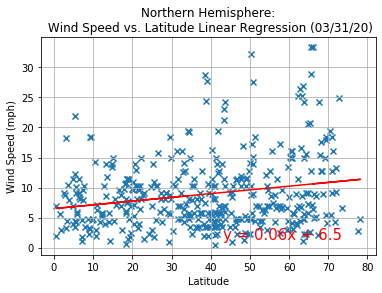

In [23]:
linearRegression(northern_hemisphere['Lat'],northern_hemisphere['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere:\n Wind Speed vs. Latitude Linear Regression (03/31/20)")
plt.savefig("../output_data/figure11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2987550930039398


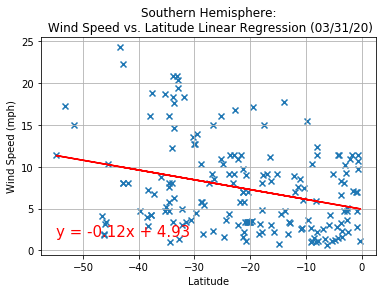

In [24]:
linearRegression(southern_hemisphere['Lat'],southern_hemisphere['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere:\n Wind Speed vs. Latitude Linear Regression (03/31/20)")
plt.savefig("../output_data/figure12.png")
plt.show()